In [1]:
# %load /home/jonathan/.ipython/profile_default/startup/startup-01.py
# start up settings for ipython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

plt.style.use('ggplot')
plt.rcParams['font.size'] = 15.0
plt.rcParams['axes.labelsize'] = 15.0
plt.rcParams['xtick.labelsize'] = 15.0
plt.rcParams['ytick.labelsize'] = 15.0
plt.rcParams['legend.fontsize'] = 15.0

%matplotlib inline

# set the max column width
pd.options.display.max_colwidth = 1000
# to avoid have warnings from chained assignments
pd.options.mode.chained_assignment = None


# Import results

In [2]:
# converter functions
def strip_str(text):
    try:
        text = (text + '').strip()
        if text == 'na':
            return np.nan
        else:
            return text
    except: 
        return text

    
def to_int(text):
    text = strip_str(text)
    try:
        # pandas cannot store nan as integer
        if pd.isnull(text):
            text = -1
        return int(text)
    except:
        return text
    
    
def to_float(text):
    text = strip_str(text)
    try:
        return float(text)
    except:
        return text
    

def to_bool(text):
    text = strip_str(text)
    try:
        return True if text == 'true' else False
    except:
        return text
    
converters = {
    '_id': to_int,
    'LogPath': strip_str,
    'ModelPath': strip_str,
    'Log': strip_str, 'Model': strip_str, 
    'Monolithic': to_bool,
    'Decomposition': strip_str, 'RecomposeStrategy': strip_str,
    'LogCreationStrategy': strip_str, 
    'PreferBorderTransitions': to_bool, 
    'AddConflictOnlyOnce': to_bool,
    'UseHideAndReduceAbstraction': to_bool,
    'GlobalDurationThreshold': to_int,
    'LocalDurationThreshold': to_int,
    'LogMoveCost': to_int, 'ModelMoveCost': to_int,
    'RelativeIntervalThreshold': to_int,
    'AbsoluteIntervalThreshold': to_int,
    'MaxConflictThreshold': to_int,
    'AlignmentPercentageThreshold': to_int,
    'MaxIterationThreshold': to_int,
    'CostIntervalLo': to_float,
    'CostIntervalHi': to_float,
    'FitnessLo': to_float,
    'FitnessHi': to_float,
    'Aligned': to_int, 'ToAlign': to_int, 'Rejected': to_int,
    'TotalTraces': to_int, 'RecompositionStepsTaken': to_int,
    'TotalTimeTaken': to_int
}

# 20180501
result_20180501_df_list = []
for d in os.listdir('../Final 20180501/'):
    if '2018' in d:
        dirpath = os.path.join('../Final 20180501/', d)
        result_fpath = os.path.join(dirpath, 'results.csv')
        df = pd.read_csv(result_fpath, converters=converters)
        result_20180501_df_list.append(df)
        
# BPIC18
result_bpic18_df_list = []
for d in os.listdir('../Final BPIC18/'):
    if '2018' in d:
        dirpath = os.path.join('../Final BPIC18/', d)
        result_fpath = os.path.join(dirpath, 'results.csv')
        df = pd.read_csv(result_fpath, converters=converters)
        result_bpic18_df_list.append(df)
        
result_20180501_df = pd.concat(result_20180501_df_list)
result_bpic18_df = pd.concat(result_bpic18_df_list)
result_bpic18_df['_id'] = result_bpic18_df['_id'].astype(np.int64)
result_bpic18_df['Monolithic'] = result_bpic18_df['Monolithic'].astype(np.bool)
result_bpic18_df['PreferBorderTransitions'] = result_bpic18_df['PreferBorderTransitions'].astype(np.bool)
result_bpic18_df['AddConflictOnlyOnce'] = result_bpic18_df['AddConflictOnlyOnce'].astype(np.bool)
result_bpic18_df['UseHideAndReduceAbstraction'] = result_bpic18_df['UseHideAndReduceAbstraction'].astype(np.bool)
result_bpic18_df['GlobalDurationThreshold'] = result_bpic18_df['GlobalDurationThreshold'].astype(np.int64)
result_bpic18_df['LocalDurationThreshold'] = result_bpic18_df['LocalDurationThreshold'].astype(np.int64)
result_bpic18_df['LogMoveCost'] = result_bpic18_df['LogMoveCost'].astype(np.int64)
result_bpic18_df['ModelMoveCost'] = result_bpic18_df['ModelMoveCost'].astype(np.int64)
result_bpic18_df['RelativeIntervalThreshold'] = result_bpic18_df['RelativeIntervalThreshold'].astype(np.int64)
result_bpic18_df['AbsoluteIntervalThreshold'] = result_bpic18_df['AbsoluteIntervalThreshold'].astype(np.int64)
result_bpic18_df['MaxConflictThreshold'] = result_bpic18_df['MaxConflictThreshold'].astype(np.int64)
result_bpic18_df['AlignmentPercentageThreshold'] = result_bpic18_df['AlignmentPercentageThreshold'].astype(np.int64)
result_bpic18_df['MaxIterationThreshold'] = result_bpic18_df['MaxIterationThreshold'].astype(np.int64)
result_bpic18_df['Aligned'] = result_bpic18_df['Aligned'].astype(np.int64)
result_bpic18_df['ToAlign'] = result_bpic18_df['ToAlign'].astype(np.int64)
result_bpic18_df['Rejected'] = result_bpic18_df['Rejected'].astype(np.int64)
result_bpic18_df['TotalTraces'] = result_bpic18_df['TotalTraces'].astype(np.int64)
result_bpic18_df['RecompositionStepsTaken'] = result_bpic18_df['RecompositionStepsTaken'].astype(np.int64)
result_bpic18_df['TotalTimeTaken'] = result_bpic18_df['TotalTimeTaken'].astype(np.int64)

# add feasibility column
result_20180501_df['feasible'] = result_20180501_df['Aligned'] == result_20180501_df['TotalTraces']
result_bpic18_df['feasible'] = result_bpic18_df['Aligned'] == result_bpic18_df['TotalTraces']

# we are ignoring no-noise datasets
result_20180501_df = result_20180501_df[~(result_20180501_df['Log'].str.endswith('0-0'))]
# we are also ignoring 60-60 because no configuration was feasible
result_20180501_df = result_20180501_df[~(result_20180501_df['Log'].str.endswith('60-60'))]
# ignoring configuration MFCS-5
result_20180501_df = result_20180501_df[~(result_20180501_df['RecomposeStrategy'] == 'Top five most frequent conflicts set')]

# change the log name for BPIC18
result_bpic18_df['Log'] = 'BPIC18'

# do time in seconds
result_20180501_df['TotalTimeTaken'] /= 1000
result_bpic18_df['TotalTimeTaken'] /= 1000

# 2018-05-01
# put time as limit if not feasible, limit is 15 minutes or 900 seconds
result_20180501_df['TotalTimeTaken'] = result_20180501_df.apply(
    lambda row: row['TotalTimeTaken'] if row['feasible'] == True else 900, axis=1
)
# BPIC18, same as above but limit is 30 minutes or 1800 seconds
result_bpic18_df['TotalTimeTaken'] = result_bpic18_df.apply(
    lambda row: row['TotalTimeTaken'] if row['feasible'] == True else 1800, axis=1
)

# put monolithic as both net and log recomposition strategies
result_20180501_df['RecomposeStrategy'] = result_20180501_df[['RecomposeStrategy', 'Monolithic']].apply(
    lambda row: 'Monolithic' if row['Monolithic'] == True else row['RecomposeStrategy'], axis=1
)
result_20180501_df['LogCreationStrategy'] = result_20180501_df[['LogCreationStrategy', 'Monolithic']].apply(
    lambda row: 'Monolithic' if row['Monolithic'] == True else row['LogCreationStrategy'], axis=1
)
result_bpic18_df['RecomposeStrategy'] = result_bpic18_df[['RecomposeStrategy', 'Monolithic']].apply(
    lambda row: 'Monolithic' if row['Monolithic'] == True else row['RecomposeStrategy'], axis=1
)
result_bpic18_df['LogCreationStrategy'] = result_bpic18_df[['LogCreationStrategy', 'Monolithic']].apply(
    lambda row: 'Monolithic' if row['Monolithic'] == True else row['LogCreationStrategy'], axis=1
)

# map the strategy names
net_strategy_map = {
    'All conflicts': 'All',
    'Random conflicts': 'Random',
    'Most frequent conflicts': 'MFC',
    'Merge conflict graph': 'MCG',
    'Score-based': 'Balanced',
    'Top five most frequent conflicts set': 'MFCS-5',
    'Top one most frequent conflicts set': 'MFCS-1',
    'Top ten most frequent conflicts set': 'MFCS-10',
    'Top three most frequent conflicts set': 'MFCS-3', 
    'Monolithic': 'Monolithic'
}

log_strategy_map = {
    'Group by conflicts': 'IC',
    'Strict exclude by conflicts': 'SIC',
    'Include all': 'All', 
    'Monolithic': 'Monolithic'
}

result_20180501_df['net_strategy_short'] = result_20180501_df.RecomposeStrategy.apply(lambda val: net_strategy_map[val])
result_20180501_df['log_strategy_short'] = result_20180501_df.LogCreationStrategy.apply(lambda val: log_strategy_map[val])

result_bpic18_df['net_strategy_short'] = result_bpic18_df.RecomposeStrategy.apply(lambda val: net_strategy_map[val])
result_bpic18_df['log_strategy_short'] = result_bpic18_df.LogCreationStrategy.apply(lambda val: log_strategy_map[val])

result_20180501_df['strategy_short'] = result_20180501_df['net_strategy_short'] + ' - ' + result_20180501_df['log_strategy_short']
result_bpic18_df['strategy_short'] = result_bpic18_df['net_strategy_short'] + ' - ' + result_bpic18_df['log_strategy_short']
result_20180501_df['strategy_short'] = result_20180501_df['strategy_short'].apply(lambda val: 'Monolithic' if val == 'Monolithic - Monolithic' else val)
result_bpic18_df['strategy_short'] = result_bpic18_df['strategy_short'].apply(lambda val: 'Monolithic' if val == 'Monolithic - Monolithic' else val)

# sort everything by time
cols_to_sort = ['Model', 'Log', 'RecomposeStrategy', 'TotalTimeTaken']
result_20180501_df.sort_values(cols_to_sort, inplace=True)
result_bpic18_df.sort_values(cols_to_sort, inplace=True)

## Get the best configuration per dataset

In [3]:
best_result_20180501_df = result_20180501_df[
    (result_20180501_df['log_strategy_short'].isin(['IC', 'SIC', 'Monolithic']))
].groupby(['Model', 'Log', 'RecomposeStrategy'], as_index=False).apply(lambda df: df.head(1))

# join the two 
best_result_df = pd.concat([best_result_20180501_df, result_bpic18_df])
best_times = best_result_df.groupby('Log', as_index=False).agg({'TotalTimeTaken': 'min'})
best_times = best_times.rename(columns={'TotalTimeTaken': 'aux'}, index=str)
time_gain_from_second_best = best_result_df.groupby('Log', as_index=False).agg({'TotalTimeTaken': lambda vals: sorted(vals)[1] - min(vals)})
time_gain_from_second_best = time_gain_from_second_best.rename(columns={'TotalTimeTaken': 'time_gain'}, index=str)
best_result_df = best_result_df.merge(best_times, on='Log')
best_result_df = best_result_df.merge(time_gain_from_second_best, on='Log')
best_result_df['fastest'] = best_result_df['TotalTimeTaken'] == best_result_df['aux']
best_result_df.drop('aux', inplace=True, axis=1)

### Plot Time vs. Iteration vs. dataset

In [6]:
import svgutils.transform as sg

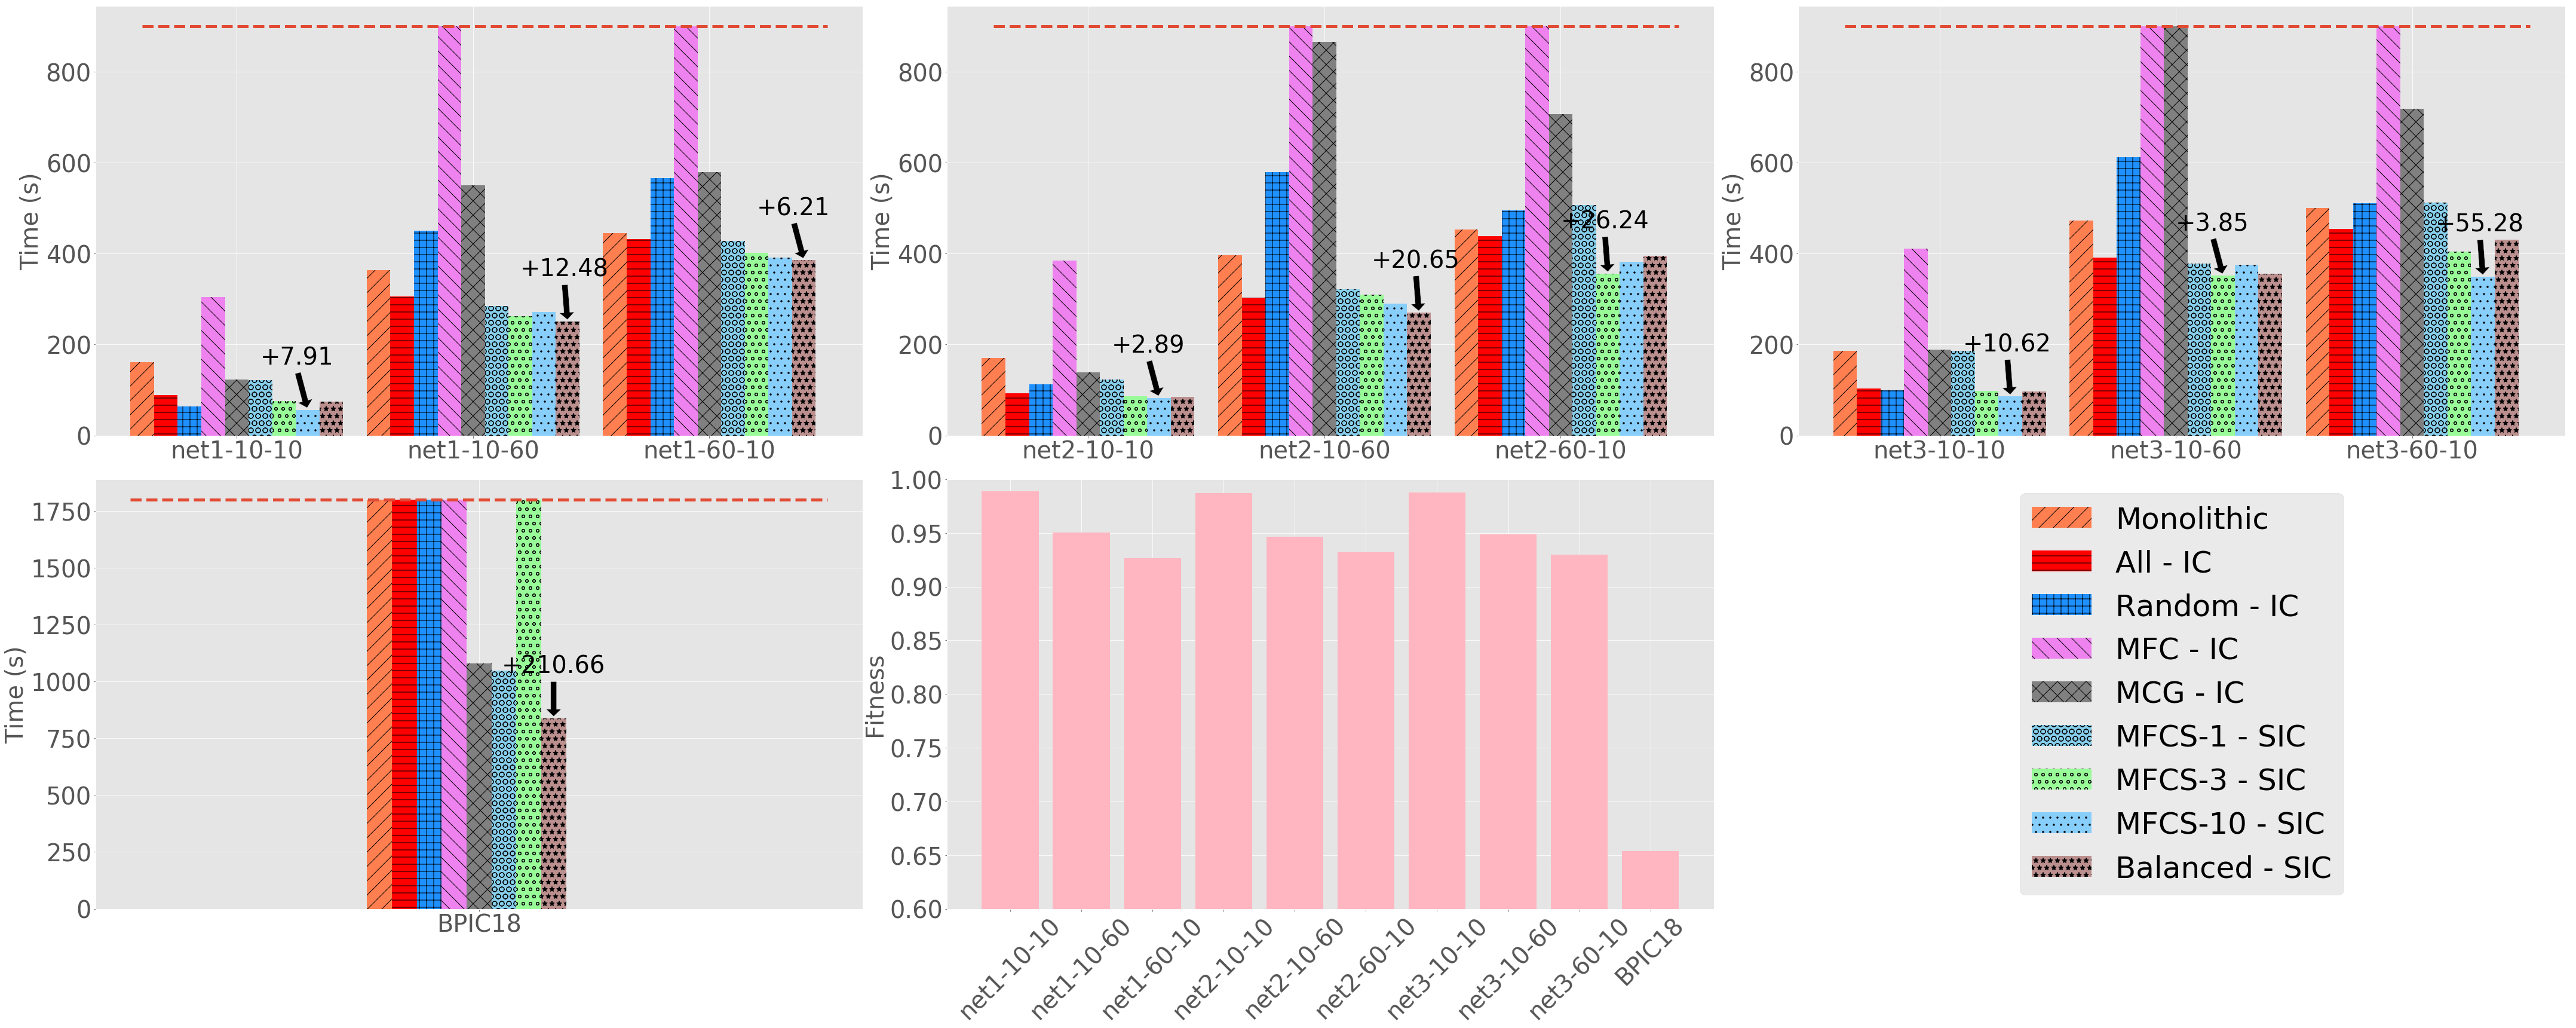

In [21]:
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(60, 24))

ind = np.arange(3)
width = 0.10
colormap = {
    'All - IC': 'r',
    'Random - IC': 'dodgerblue',
    'MCG - IC': 'grey',
    'MFC - IC': 'violet',
    'Balanced - SIC': 'rosybrown',
    'MFCS-3 - SIC': 'palegreen',
    'MFCS-1 - SIC': 'skyblue',
    'MFCS-10 - SIC': 'lightskyblue',
    'Monolithic': 'coral'
}

hatchmap = {
    'All - IC': '-',
    'Random - IC': '+',
    'MCG - IC': 'x',
    'MFC - IC': '\\',
    'Balanced - SIC': '*',
    'MFCS-3 - SIC': 'o',
    'MFCS-1 - SIC': 'O',
    'MFCS-10 - SIC': '.',
    'Monolithic': '/'
}

strategy_order = [
    'Monolithic',
    # baselines
    'All - IC', 'Random - IC', 
    # current one
    'MFC - IC', 
    'MCG - IC', 'MFCS-1 - SIC', 'MFCS-3 - SIC', 'MFCS-10 - SIC', 'Balanced - SIC'
]

net_order = [
    'net1', 'net2', 'net3', 'BPIC18'
]

# TODO: make plotting into a function to loop over net1 -> net5
# TODO: point to the winner strategy using arrows

# net 1
p_list = []

def plot_time(best_result_df, net, ax, time_limit, strategy_order, colormap, hatchmap):
    best_n1_result_df = best_result_df[(best_result_df['Model'] == net)]
    cols_to_select_time = ['Log', 'TotalTimeTaken', 'fastest', 'time_gain', 'strategy_short']
    best_n1_time = best_n1_result_df[cols_to_select_time].groupby('strategy_short')

    # add time limit line
    ax.plot((0, ind.max() + width * len(strategy_order)), [time_limit, time_limit], '--', linewidth=5)

    for i, name in enumerate(strategy_order):
        if name not in best_n1_time.groups:
            continue
        group = best_n1_time.get_group(name)
    #     print(name)
        group_time = group['TotalTimeTaken'].values
    #     print(group_time.values)
        color = colormap[name]
        hatch = hatchmap[name]
        if group_time.shape[0] == 1:
            barx = ind.max() / 2 + width * i
        else:
            barx = ind + width * i
        pi = ax.bar(barx, group_time, width, color=color, hatch=hatch)
        if len(p_list) < len(strategy_order):
            p_list.append((name, pi[0]))

        if group_time.shape[0] == 1:
            time_gain = '+{:.2f}'.format(group['time_gain'].values[0])
            if not group['fastest'].values[0]:
                continue
            dx = 0
            dy = 200
            y = group_time[0]
            x = ind.max() / 2 + width * i
            ax.annotate(time_gain, xy=(x, y), xytext=(x + dx, y + dy), ha='center', fontsize=40,
                         arrowprops=dict(facecolor='black', shrink=0.05, width=10, headwidth=25))
        else:
            for j, (time, fastest, time_gain) in enumerate(zip(group_time, group['fastest'].values, group['time_gain'].values)):
                if not fastest:
                    continue
                time_gain = '+{:.2f}'.format(time_gain)
                dx = -0.2
                dy = 100
                y = time
                x = j + width * i
        #         ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
        #             arrowprops=dict(facecolor='black', shrink=0.05),
        #             )
                ax.annotate(time_gain, xy=(x, y), xytext=(x + dx, y + dy), fontsize=40,
                             arrowprops=dict(facecolor='black', shrink=0.05, width=10, headwidth=25))

    if net == 'BPIC18':
        ax.set_xticks(np.asarray([ind.max()]) / 2 + width * 4)
        ax.set_xticklabels(best_n1_result_df['Log'].unique())
    else:
        ax.set_xticks(ind + width * 4)
        ax.set_xticklabels(best_n1_result_df['Log'].unique())
    ax.set_ylabel('Time (s)', fontsize=40)
    ax.tick_params(labelsize=40)
    ax.autoscale_view()

for net_ind, net in enumerate(net_order):
    net_row = net_ind // ncols
    net_col = net_ind % ncols
    ax = axes[net_row, net_col]
    time_limit = 900 if net != 'BPIC18' else 1800
    if net == 'BPIC18':
        strategy_order = list(filter(lambda s: s != 'MFCS-10 - SIC', strategy_order))
    plot_time(best_result_df, net, ax, time_limit, strategy_order, colormap, hatchmap)

# plot the fitness of all the datasets
fitness_df = best_result_df[(best_result_df['feasible'] == True)&
                           (best_result_df['Monolithic'] == False)&
                           (best_result_df['Model'].isin(net_order))][['Model', 'Log', 'FitnessLo']]
fitness_df = fitness_df.drop_duplicates(['Model', 'Log'])
ax4 = axes[1, 1]
fitness_series = fitness_df['FitnessLo']
barx = np.arange(len(fitness_series))
ax4.bar(barx, fitness_series, color='lightpink')
ax4.set_ylim([0.6, 1.])
ax4.set_ylabel('Fitness', fontsize=40)
ax4.set_xticks(barx)
ax4.set_xticklabels(fitness_df['Log'].values, rotation=45)
ax4.tick_params(labelsize=40)
    
ax5 = axes[1, 2]
ax5.axis('off')
names = map(lambda pi: pi[0], p_list)
ps = map(lambda pi: pi[1], p_list)
ax5.legend(ps, names, fontsize=50, loc='center')

fig.tight_layout();
fig.savefig('./TimeBarchart.svg', bbox_inches='tight', rasterized=True);